In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report

plt.rcParams['figure.figsize'] = [20, 12]

df = pd.read_csv("profiles.csv")

# IMPORTANT these lines only if you want rows with responses to all questions
# df.dropna(inplace=True)
df.fillna('no_answer', inplace=True)


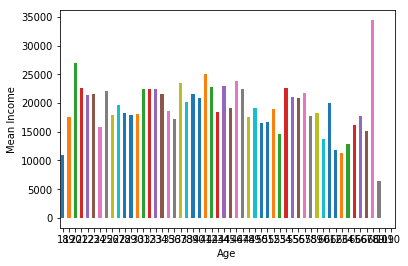

In [2]:
# the question is how well can a persons diet and substance use determine age income or body_type

income_by_age = df.groupby(df.age).income.mean()
income_by_age.plot.bar(rot=0)
plt.xlabel("Age")
plt.ylabel("Mean Income")
plt.show()


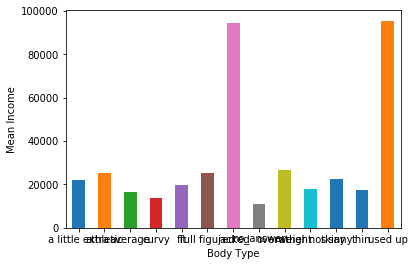

In [3]:
income_by_body_type = df.groupby(df.body_type).income.mean()
income_by_body_type.plot.bar(rot=0)
plt.xlabel("Body Type")
plt.ylabel("Mean Income")
plt.show()

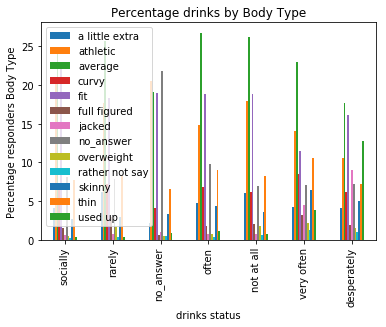

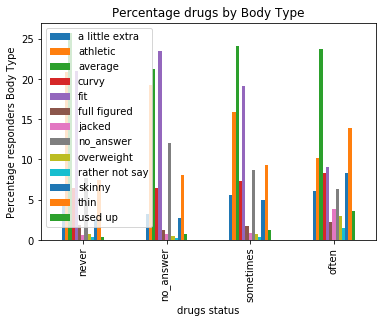

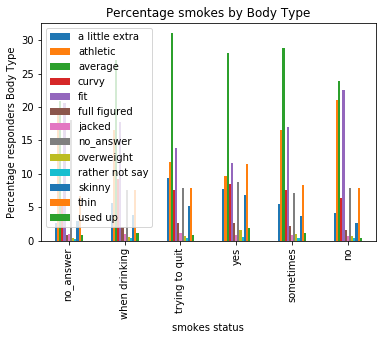

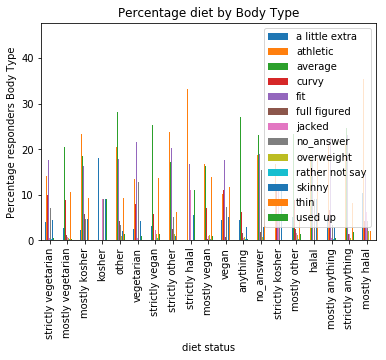

In [4]:
def percentage_body_type_by_other(other_column):
    results = {}
    for f in df.groupby(df[other_column]): 
        results[f[0]] = f[1].body_type.value_counts()

    two_way = pd.DataFrame()
    for label, value_count in results.items():
        value_count.name = label
        value_count = (value_count / value_count.sum()) * 100
        row = value_count.to_frame().transpose()
        two_way = pd.concat([two_way, row], axis=0)

    two_way.plot.bar(rot=0)
    plt.title("Percentage " + other_column + " by Body Type")
    plt.xlabel(other_column + " status")
    plt.xticks(rotation=90)
    plt.ylabel("Percentage responders Body Type")
    plt.show()

for label in ["drinks", "drugs", "smokes", "diet"]:
    percentage_body_type_by_other(label)



In [5]:
# Translate categorical feature data into numerical... 

body_type_map = {
    "no_answer": 0,
    "rather not say": 1,
    "used up": 2,
    "overweight": 3, 
    "curvy": 4,
    "full figured": 5, 
    "a little extra": 6,
    "skinny": 7,
    "thin": 8, 
    "average": 9,
    "fit": 10,
    "athletic": 11,
    "jacked": 12
}

drug_type_map = {
    "no_answer": 0,
    "never": 1,
    "sometimes": 2,
    "often": 3
}

drink_type_map = {
    "no_answer": 0,
    "not at all": 1,
    "rarely": 2,
    "socially": 3,
    "often": 4,
    "very often": 5,
    "desperately": 6
}

smoke_type_map = {
    "no_answer": 0,
    "no": 1,
    "trying to quit": 2,
    "when drinking": 3,
    "sometimes": 4,
    "yes": 5
}

diet_type_map = {
    "no_answer": 0,
    "strictly vegan": 1, 
    "vegan": 2,
    "mostly vegan": 3, 
    "strictly vegetarian": 4, 
    "vegetarian": 5, 
    "mostly vegetarian": 6, 
    "mostly anything": 7,
    "anything": 8,
    "strictly anything": 9
}

feature_data = df[["diet", "drinks", "drugs", "body_type", "smokes", "income", "age"]]

feature_data.dropna(inplace=True)

feature_data["diet_code"]  = feature_data.diet.map(diet_type_map)
feature_data["drinks_code"]  = feature_data.drinks.map(drink_type_map)
feature_data["smokes_code"]  = feature_data.smokes.map(smoke_type_map)
feature_data["drugs_code"]  = feature_data.drugs.map(drug_type_map)
feature_data["body_code"]  = feature_data.body_type.map(body_type_map)
feature_data.dropna(inplace=True)
feature_data = feature_data[feature_data.income != -1]


/Users/liam/anaconda2/envs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/liam/anaconda2/envs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/liam/anaconda2/envs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-vie

Input data shape: (10998, 6)
Independent Variables: income, diet_code, drinks_code, smokes_code, drugs_code, body_code
Dependent Variable: age
Train Score: 0.042332739364382754
Test Score: 0.04995830280401504
[('smokes_code', -5.72685166999203), ('drinks_code', -4.541424576130044), ('drugs_code', -1.7977144151184188), ('diet_code', -1.6844946350432741), ('body_code', 0.3124906365850019), ('income', 0.25781812970865275)]
25    651
27    648
28    640
26    617
29    574
24    559
30    533
23    508
32    460
31    457
22    395
33    372
34    343
35    301
21    281
37    279
36    274
38    266
20    237
42    217
39    215
41    209
40    184
43    171
44    133
45    125
46    119
47    108
19    102
48     93
50     82
49     82
52     75
51     62
54     61
18     59
56     59
55     59
57     56
58     41
59     41
53     34
61     33
60     30
65     28
62     27
66     23
63     22
64     18
68     16
67     15
69      4
Name: age, dtype: int64


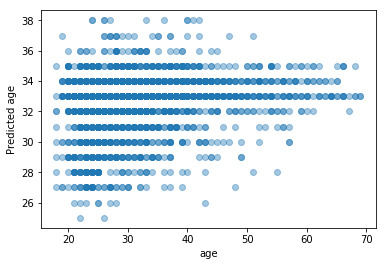

Input data shape: (10998, 6)
Independent Variables: income, age, diet_code, drinks_code, smokes_code, drugs_code
Dependent Variable: body_code
Train Score: 0.026482185591757967
Test Score: 0.03385820646163096
[('diet_code', 1.0393306924170718), ('smokes_code', -0.6534981756674716), ('drugs_code', -0.6117384721531967), ('income', 0.3357156100696346), ('age', 0.12298715195047594), ('drinks_code', 0.08646573536706577)]
9     2842
11    2362
10    2130
6      719
8      717
4      643
0      558
7      378
5      246
3      160
12     122
2       85
1       36
Name: body_code, dtype: int64


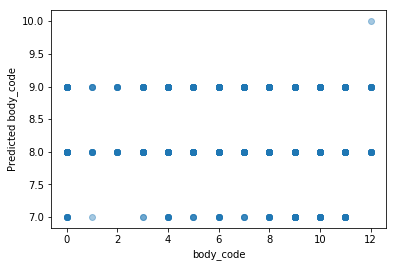

In [6]:
# Apply a preprocessed MinMaxScalar multiplelinear regression to independent and dependent features
def multiple_linear_regression(feature_data, dependent_column):
    dependent_data = feature_data[dependent_column]
    labels_to_drop = ["diet", "drinks", "drugs", "body_type", "smokes"] + [dependent_column]
    new_feature_data = feature_data.drop(labels=labels_to_drop, axis=1)

    feature_values = new_feature_data.values
    min_max_scaler = preprocessing.MinMaxScaler()
    feature_values_scaled = min_max_scaler.fit_transform(feature_values)

    new_feature_data = pd.DataFrame(feature_values_scaled, columns=new_feature_data.columns)

    X_train, X_test, y_train, y_test = train_test_split(new_feature_data, dependent_data, test_size = 0.2, random_state = 1)

    model = LinearRegression()
    model.fit(X_train,y_train)
    
    print("Input data shape: " + str(new_feature_data.shape))
    print("Independent Variables: " + ", ".join(list(new_feature_data.columns)) )
    print("Dependent Variable: " + dependent_column)
    print('Train Score:', model.score(X_train,y_train))
    print('Test Score:', model.score(X_test,y_test))
    print(sorted(list(zip(new_feature_data.columns,model.coef_)),key = lambda x: abs(x[1]),reverse=True))

    y_predicted = model.predict(X_test)
    y_predicted = [int(round(prediction)) for prediction in y_predicted]
    # round to nearest 10000
    # y_predicted = [round(i / 10000.0) * 10000.0 for i in y_predicted]
    
    class_labels = [str(l) for l in dependent_data.unique().tolist()].sort()
      
    print(dependent_data.value_counts())
    # print(y_test.head())
    # print(y_predicted[0:10])
    # print(classification_report(y_test, y_predicted, target_names=class_labels))

    plt.scatter(y_test, y_predicted, alpha=0.4)
    plt.xlabel(dependent_column)
    plt.ylabel('Predicted ' + dependent_column)
    plt.show()


multiple_linear_regression(feature_data, "age")
multiple_linear_regression(feature_data, "body_code")
# multiple_linear_regression(feature_data, "income")


Input data shape: (10998, 6)
Independent Variables: income, diet_code, drinks_code, smokes_code, drugs_code, body_code
Dependent Variable: age
Score: 0.060991577172804234
             precision    recall  f1-score   support

         18       0.00      0.00      0.00         9
         19       0.00      0.00      0.00        16
         20       0.00      0.00      0.00        43
         21       0.00      0.00      0.00        63
         22       0.09      0.02      0.04        92
         23       0.07      0.02      0.03       114
         24       0.17      0.07      0.10       120
         25       0.03      0.02      0.02       144
         26       0.03      0.03      0.03       105
         27       0.08      0.09      0.09       119
         28       0.06      0.07      0.06       115
         29       0.04      0.08      0.06        98
         30       0.04      0.07      0.05       103
         31       0.05      0.06      0.05       105
         32       0.05      0.08 

/Users/liam/anaconda2/envs/py35/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


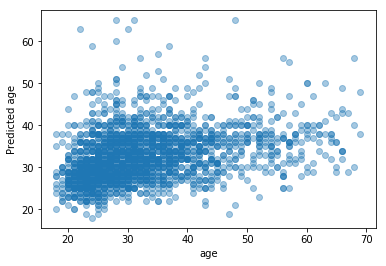

Input data shape: (10998, 6)
Independent Variables: income, age, diet_code, drinks_code, smokes_code, drugs_code
Dependent Variable: body_code
Score: -0.13684386635145618
             precision    recall  f1-score   support

          0       0.12      0.02      0.03       112
          1       0.00      0.00      0.00        12
          2       0.00      0.00      0.00        17
          3       0.00      0.00      0.00        33
          4       0.07      0.02      0.03       118
          5       0.02      0.02      0.02        47
          6       0.07      0.05      0.06       159
          7       0.05      0.17      0.08        75
          8       0.07      0.31      0.11       135
          9       0.26      0.29      0.28       589
         10       0.23      0.18      0.20       419
         11       0.21      0.05      0.08       459
         12       0.00      0.00      0.00        25

avg / total       0.18      0.15      0.15      2200



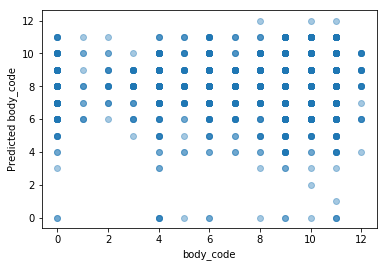

In [7]:

def k_neighboors_regression(feature_data, dependent_column):
    dependent_data = feature_data[dependent_column]
    labels_to_drop = ["diet", "drinks", "drugs", "body_type", "smokes"] + [dependent_column]
    new_feature_data = feature_data.drop(labels=labels_to_drop, axis=1)

#     TODO which noramlization/scaling is appropriate here?
    
    feature_values_scaled = scaled_data = preprocessing.scale(new_feature_data, axis=0)

#     feature_values = new_feature_data.values
#     min_max_scaler = preprocessing.MinMaxScaler()
#     feature_values_scaled = min_max_scaler.fit_transform(feature_values)

    new_feature_data = pd.DataFrame(feature_values_scaled, columns=new_feature_data.columns)

    X_train, X_test, y_train, y_test = train_test_split(new_feature_data, dependent_data, test_size = 0.2, random_state = 1)

    regressor = KNeighborsRegressor(n_neighbors = 25, weights = "distance")
    regressor.fit(X_train, y_train)
    
    print("Input data shape: " + str(new_feature_data.shape))
    print("Independent Variables: " + ", ".join(list(new_feature_data.columns)) )
    print("Dependent Variable: " + dependent_column)
    print('Score:', regressor.score(X_test, y_test))
    
    y_predicted = regressor.predict(X_test)
    y_predicted = [int(round(prediction)) for prediction in y_predicted]
    
    class_labels = [str(l) for l in dependent_data.unique().tolist()].sort()
        
    print(classification_report(y_test, y_predicted, target_names=class_labels))

    plt.scatter(y_test, y_predicted, alpha=0.4)
    plt.xlabel(dependent_column)
    plt.ylabel('Predicted ' + dependent_column)
    plt.show()

k_neighboors_regression(feature_data, "age")
k_neighboors_regression(feature_data, "body_code")
# k_neighboors_regression(feature_data, "income")


Index(['diet', 'drinks', 'drugs', 'body_type', 'smokes', 'income', 'age',
       'diet_code', 'drinks_code', 'smokes_code', 'drugs_code', 'body_code'],
      dtype='object')


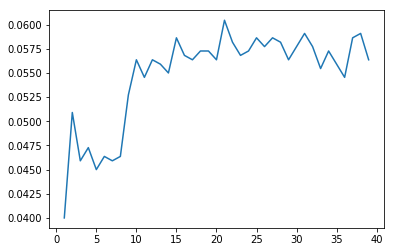

Index(['diet', 'drinks', 'drugs', 'body_type', 'smokes', 'income', 'age',
       'diet_code', 'drinks_code', 'smokes_code', 'drugs_code', 'body_code'],
      dtype='object')


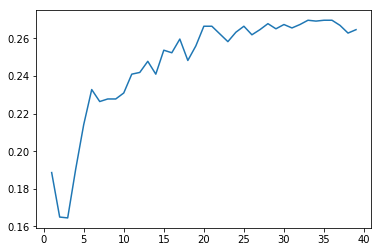

Index(['diet', 'drinks', 'drugs', 'body_type', 'smokes', 'income', 'age',
       'diet_code', 'drinks_code', 'smokes_code', 'drugs_code', 'body_code'],
      dtype='object')


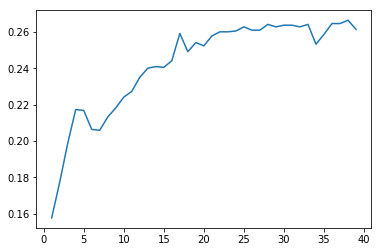

In [8]:
def k_neighboors_classifier(feature_data, dependent_column):
    labels = feature_data[dependent_column]
    print(feature_data.columns)
    cols_to_drop = ["diet", "drinks", "drugs", "body_type", "smokes", "age"] + [dependent_column]
    new_feature_data = feature_data.drop(labels=cols_to_drop, axis=1)
    
    feature_values_scaled = scaled_data = preprocessing.scale(new_feature_data, axis=0)

    new_feature_data = pd.DataFrame(feature_values_scaled, columns=new_feature_data.columns)
    
    train_data, test_data, train_labels, test_labels = train_test_split(new_feature_data, labels, test_size = 0.2, random_state = 1)

#   Plots model score for K between 1 and 200..
    k_start = 1
    k_end = 40
    scores = []
    for k in range(k_start, k_end):
        classifier = KNeighborsClassifier(n_neighbors = k)
        classifier.fit(train_data, train_labels)
        scores.append(classifier.score(test_data, test_labels))
        

    plt.plot(range(k_start, k_end), scores)
    plt.show()
    
    
#     classifier = KNeighborsClassifier(n_neighbors = 5)
#     classifier.fit(train_data, train_labels)

#     print("Input data shape: " + str(new_feature_data.shape))
#     print("Independent Variables: " + ", ".join(list(new_feature_data.columns)) )
#     print("Dependent Variable: " + dependent_column)
#     print('Score:', classifier.score(test_data, test_labels))
    
#     y_predicted = classifier.predict(test_data)

#     plt.scatter(test_labels, y_predicted, alpha=0.4)
#     plt.xlabel(dependent_column)
#     plt.ylabel('Predicted ' + dependent_column)
#     plt.show()

k_neighboors_classifier(feature_data, "age")
k_neighboors_classifier(feature_data, "body_code")
k_neighboors_classifier(feature_data, "income")



1    5727
0    5271
Name: over_thirty, dtype: int64
Index(['diet', 'drinks', 'drugs', 'body_type', 'smokes', 'income', 'age',
       'diet_code', 'drinks_code', 'smokes_code', 'drugs_code', 'body_code',
       'over_thirty'],
      dtype='object')


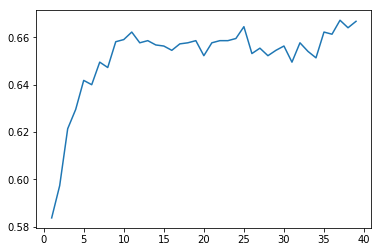

0    5878
1    1081
Name: mostly_vegatables, dtype: int64
Index(['diet', 'drinks', 'drugs', 'body_type', 'smokes', 'income', 'age',
       'diet_code', 'drinks_code', 'smokes_code', 'drugs_code', 'body_code',
       'mostly_vegatables'],
      dtype='object')


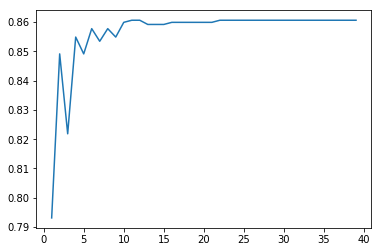

In [9]:
def k_neighboors_composit_classifier(feature_data, dependent_column, related_column):
    labels = feature_data[dependent_column]
    print(feature_data.columns)
    cols_to_drop = ["diet", "drinks", "drugs", "body_type", "smokes", "age"] + [dependent_column, related_column]
    new_feature_data = feature_data.drop(labels=cols_to_drop, axis=1)
    
    feature_values_scaled = scaled_data = preprocessing.scale(new_feature_data, axis=0)

    new_feature_data = pd.DataFrame(feature_values_scaled, columns=new_feature_data.columns)
    
    train_data, test_data, train_labels, test_labels = train_test_split(new_feature_data, labels, test_size = 0.2, random_state = 1)

#   Plots model score for K between 1 and 200..
    k_start = 1
    k_end = 40
    scores = []
    for k in range(k_start, k_end):
        classifier = KNeighborsClassifier(n_neighbors = k)
        classifier.fit(train_data, train_labels)
        scores.append(classifier.score(test_data, test_labels))

    plt.plot(range(k_start, k_end), scores)
    plt.show()
    
    
#     classifier = KNeighborsClassifier(n_neighbors = 5)
#     classifier.fit(train_data, train_labels)

#     print("Input data shape: " + str(new_feature_data.shape))
#     print("Independent Variables: " + ", ".join(list(new_feature_data.columns)) )
#     print("Dependent Variable: " + dependent_column)
#     print('Score:', classifier.score(test_data, test_labels))
    
#     y_predicted = classifier.predict(test_data)

#     plt.scatter(test_labels, y_predicted, alpha=0.4)
#     plt.xlabel(dependent_column)
#     plt.ylabel('Predicted ' + dependent_column)
#     plt.show()

over_thirty_set = feature_data.copy()
over_thirty_set["over_thirty"] = over_thirty_set.apply(lambda user: 1 if user['age'] >= 30 else 0, axis=1)
print(over_thirty_set.over_thirty.value_counts())
k_neighboors_composit_classifier(over_thirty_set, "over_thirty", "age")

mostly_vegatables_set = feature_data.copy()
mostly_vegatables_set = mostly_vegatables_set.drop(mostly_vegatables_set[mostly_vegatables_set.diet_code < 1].index)
mostly_vegatables_set["mostly_vegatables"] = mostly_vegatables_set.apply(lambda user: 1 if user['diet_code'] in [1.0, 2.0, 3.0, 4.0, 5.0, 6.0] else 0, axis=1)
print(mostly_vegatables_set.mostly_vegatables.value_counts())
k_neighboors_composit_classifier(mostly_vegatables_set, "mostly_vegatables", "diet_code")



In [ ]:
def support_vector_machine_classifier(feature_data, dependent_column, related_column):
    labels = feature_data[dependent_column]
    print(feature_data.columns)
    cols_to_drop = ["diet", "drinks", "drugs", "body_type", "smokes", "age"] + [dependent_column, related_column]
    new_feature_data = feature_data.drop(labels=cols_to_drop, axis=1)
    
    feature_values_scaled = scaled_data = preprocessing.scale(new_feature_data, axis=0)

    new_feature_data = pd.DataFrame(feature_values_scaled, columns=new_feature_data.columns)
    
    train_data, test_data, train_labels, test_labels = train_test_split(new_feature_data, labels, test_size = 0.2, random_state = 1)

#   Plots model score for Gamma between 1 and 20..
    k_start = 1
    k_end = 5
    scores = []
    for k in range(k_start, k_end):
        classifier = SVC(gamma = k/2.0)
        classifier.fit(train_data, train_labels)
        scores.append(classifier.score(test_data, test_labels))

    max_gammascore = (scores.index(max(scores)) + 1) / 2
    
    classifier = SVC(gamma = max_gammascore)
    classifier.fit(train_data, train_labels)

    test_predicted = classifier.predict(test_data)
    class_labels = [str(l) for l in test_labels.unique().tolist()].sort()

    print(classification_report(test_labels, test_predicted, target_names=class_labels))

    
    plt.plot(range(k_start, k_end), scores)
    plt.show()

over_thirty_set = feature_data.copy()
over_thirty_set["over_thirty"] = over_thirty_set.apply(lambda user: 1 if user['age'] >= 30 else 0, axis=1)
print(over_thirty_set.over_thirty.value_counts())
support_vector_machine_classifier(over_thirty_set, "over_thirty", "age")

mostly_vegatables_set = feature_data.copy()
mostly_vegatables_set = mostly_vegatables_set.drop(mostly_vegatables_set[mostly_vegatables_set.diet_code < 1].index)
mostly_vegatables_set["mostly_vegatables"] = mostly_vegatables_set.apply(lambda user: 1 if user['diet_code'] in [1.0, 2.0, 3.0, 4.0, 5.0, 6.0] else 0, axis=1)
print(mostly_vegatables_set.mostly_vegatables.value_counts())
support_vector_machine_classifier(mostly_vegatables_set, "mostly_vegatables", "diet_code")

1    5727
0    5271
Name: over_thirty, dtype: int64
Index(['diet', 'drinks', 'drugs', 'body_type', 'smokes', 'income', 'age',
       'diet_code', 'drinks_code', 'smokes_code', 'drugs_code', 'body_code',
       'over_thirty'],
      dtype='object')
